In the following, we want to define a geometry of a cascade case domain.
The domain should use profilepoints to define the shape of the airfoil.
In this case, the airfoil is generated using the naca_airfoil_creator function from ntrfc.

Lets start with importing all necessary modules

In [1]:
import pyvista as pv
import numpy as np
import os

from ntrfc.cascade_case.domain import DomainParameters
from ntrfc.cascade_case.domain import CascadeDomain2D
from ntrfc.turbo.airfoil_generators.naca_airfoil_creator import naca

Lets set the jupyter backend for this jupyternotebook.
This is not necessary for the work in a normal shell

In [2]:
pv.set_jupyter_backend("static")

if os.getenv('DISPLAY') is None:
    pv.start_xvfb()  # Start X virtual framebuffer (Xvfb)

Define the profile points and define an alpha value for the alpha-shape of the airfoil

In [3]:
xs,ys = naca("6510",256)
points = pv.PolyData(np.stack([xs,ys,np.zeros(len(xs))]).T)
alpha = 1

Lets compute the airfoil and define domain parameters

In [4]:
domainparas = DomainParameters()
domainparas.generate_params_by_pointcloud(points)
domainparas.xinlet=-3
domainparas.xoutlet=4
domainparas.pitch=2
domainparas.blade_yshift=0.1

ratio of cleaned sites: 0.8973384030418251


/home/many/miniconda3/envs/NTRfC/lib/python3.10/site-packages/pyvista/core/filters/poly_data.py:2848: PyVistaFutureWarning: The default value of the ``capping`` keyword argument will change in a future version to ``True`` to match the behavior of VTK. We recommend passing the keyword explicitly to prevent future surprises.
  warnings.warn(


You can define a domain with the CascadeDomain2D class and its method 'from_cascade_parameters'.
The Class has a plot-method which can be used to illustrate the domain.

In [5]:
domain2d = CascadeDomain2D()
domain2d.generate_from_cascade_parameters( domainparas)
figpath = domainparas.plot_domainparas()


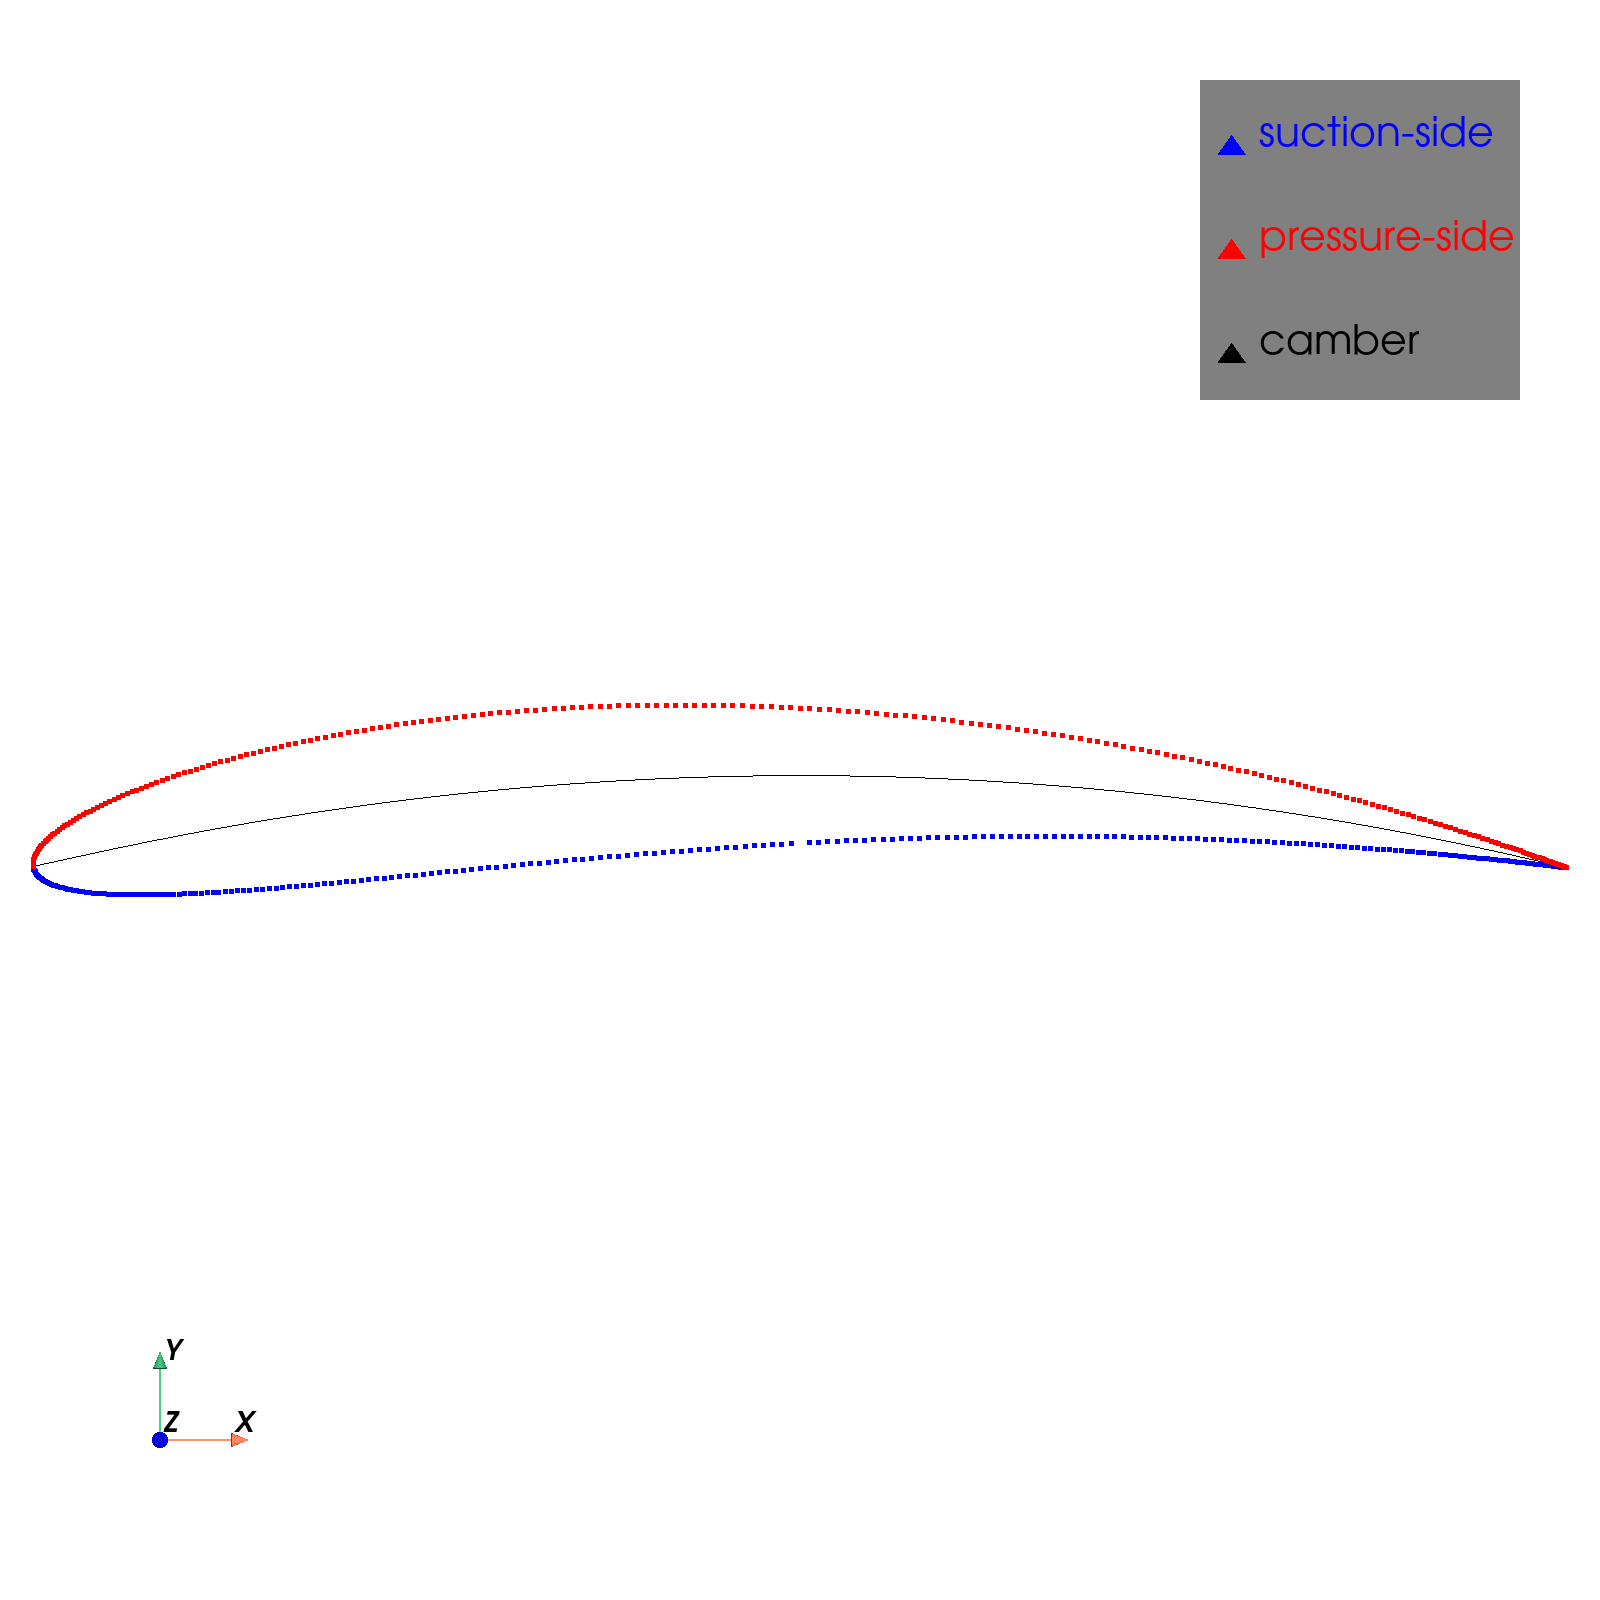

In [6]:
from IPython.display import Image

Image(figpath, width=400, height=400)
